In [ ]:
!pip install pandas matplotlib seaborn ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [135]:

import numpy as np
from datetime import datetime
import random as random
# Function to generate a random date within a given range
def random_dates(start, end, n=10):
    start_u = start.timestamp()
    end_u = end.timestamp()
    return [datetime.fromtimestamp(random.uniform(start_u, end_u)) for _ in range(n)]

# Generate random data
n = 100  # Number of rows
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 7, 13)

random_dates = random_dates(start_date, end_date, n)
day_of_week = [date.weekday() for date in random_dates]
humidity = np.random.uniform(20, 60, n)
wind_speed = np.random.uniform(0, 20, n)
pressure = np.random.uniform(900, 1000, n)
temperature = np.random.uniform(n)
location = np.random.choice(['karnataka', 'Mumbai', 'New Delhi','Pune','Kolkata','Chennai','Hyderabad','Bengal'], n)

# Create a DataFrame
data = {
    'Date': random_dates,
    'DayOfWeek': day_of_week,
    'Humidity': humidity,
    'WindSpeed': wind_speed,
    'Pressure': pressure,
    'Temperature': temperature,
    'location': location
}



df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/content/weather1.csv', index=False)

# Load weather data from CSV file
df = pd.read_csv('/content/weather1.csv')

# Display first few rows and check data types
print(df.head())
print(df.info())


                         Date  DayOfWeek   Humidity  WindSpeed    Pressure  \
0  2023-12-30 15:23:34.345895          5  34.085708  12.790982  993.873341   
1  2024-05-01 02:07:49.717740          2  26.243770   8.771774  942.288632   
2  2024-01-31 03:24:25.860523          2  33.357630   7.755857  943.568316   
3  2023-05-06 01:41:30.679171          5  48.280519   1.291480  949.962265   
4  2023-08-26 05:39:35.049623          5  53.432085  15.531999  904.604798   

   Temperature   location  
0    98.465452       Pune  
1    98.465452  Hyderabad  
2    98.465452       Pune  
3    98.465452  Hyderabad  
4    98.465452    Chennai  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         100 non-null    object 
 1   DayOfWeek    100 non-null    int64  
 2   Humidity     100 non-null    float64
 3   WindSpeed    100 non-null    float64
 4   Pre

In [123]:
df.isna().sum()
df.dropna()

,Date,DayOfWeek,Humidity,WindSpeed,Pressure,Temperature,location
0,2023-10-29 13:42:18.028757,6,62.029259,17.608291,1016.373315,-4.878180,karnataka
1,2024-03-10 02:22:40.547523,6,31.285445,1.017630,1004.402840,18.476609,New Delhi
2,2024-01-15 17:33:33.640765,0,85.320133,19.300126,1046.014803,11.547863,Kolkata
3,2023-03-16 11:04:05.059395,3,48.002754,1.809641,961.647473,31.909939,Bengal
4,2024-01-05 13:30:33.232967,4,62.044170,3.928465,1016.575222,16.302329,Kolkata
...,...,...,...,...,...,...,...
145,2023-02-01 00:47:05.363703,2,52.505986,15.022011,974.679909,-0.232012,New Delhi
146,2023-09-23 04:07:00.959189,5,71.146554,9.207042,998.981830,-5.394767,Bengal
147,2023-10-14 21:19:00.214943,5,48.519255,19.458016,1039.638302,35.966609,Chennai
148,2023-07-24 18:59:22.465829,0,83.557133,13.476254,1002.373246,37.709200,Pune


In [118]:
# Convert date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         150 non-null    object 
 1   DayOfWeek    150 non-null    int64  
 2   Humidity     150 non-null    float64
 3   WindSpeed    150 non-null    float64
 4   Pressure     150 non-null    float64
 5   Temperature  150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


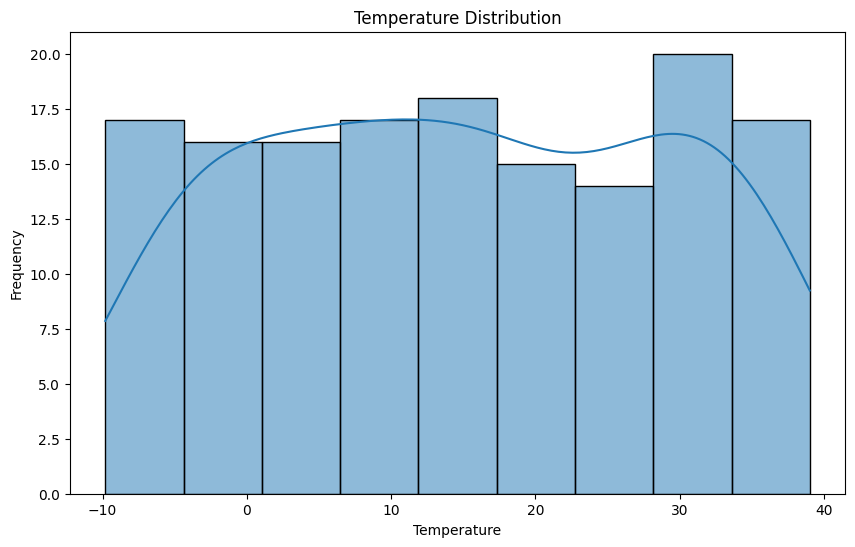

In [124]:

# Plotting the distribution of temperature - using avg temp
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

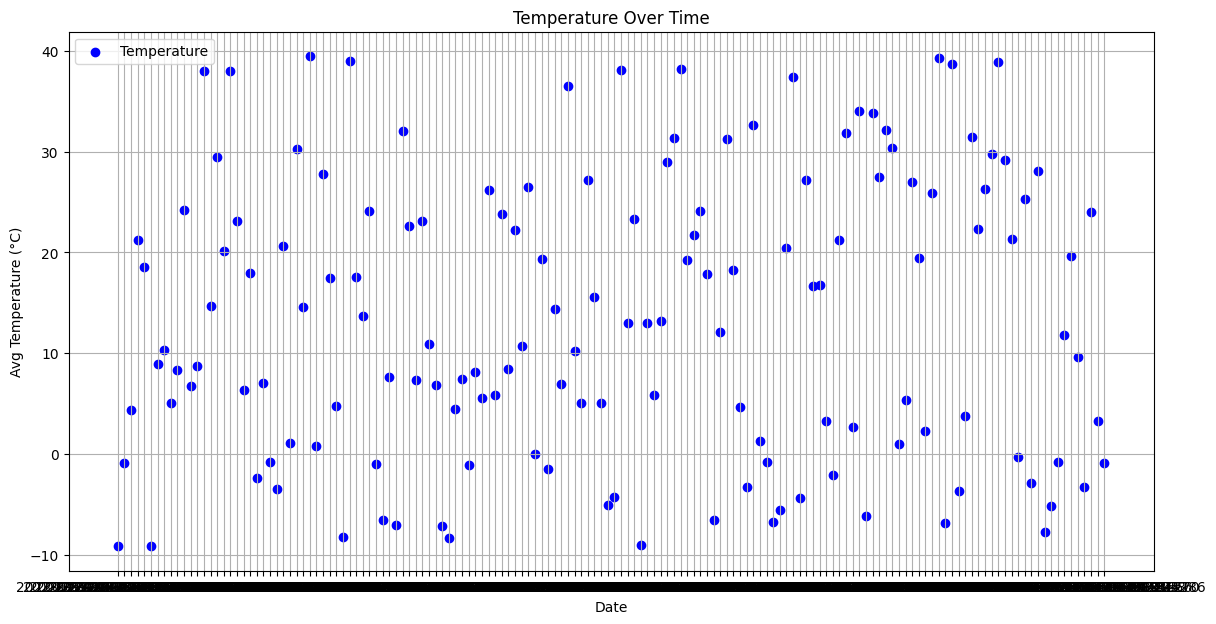

In [91]:
# Temperature scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(df['Date'], df['Temperature'], label='Temperature', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

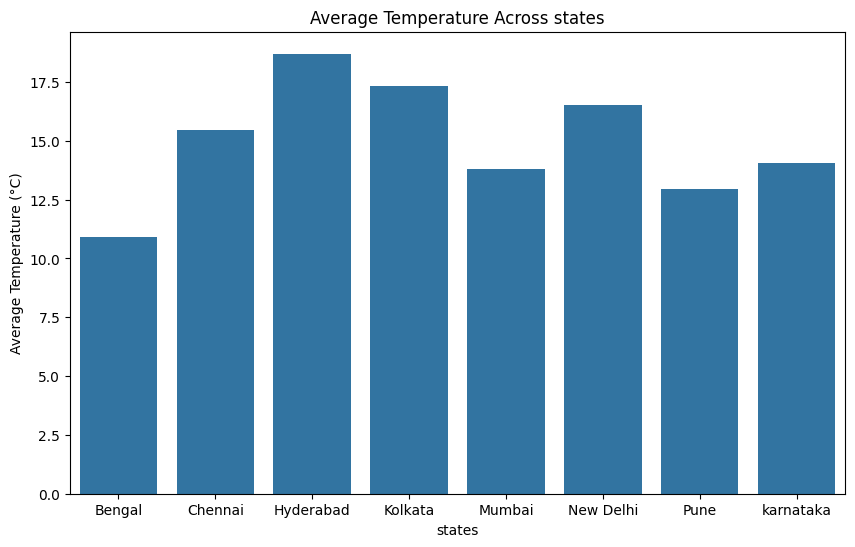

In [127]:
# Bar plot of average temperature per city
avg_temp = df.groupby('location')['Temperature'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='Temperature', data=avg_temp)
plt.title('Average Temperature Across states')
plt.xlabel('states')
plt.ylabel('Average Temperature (°C)')
plt.show()


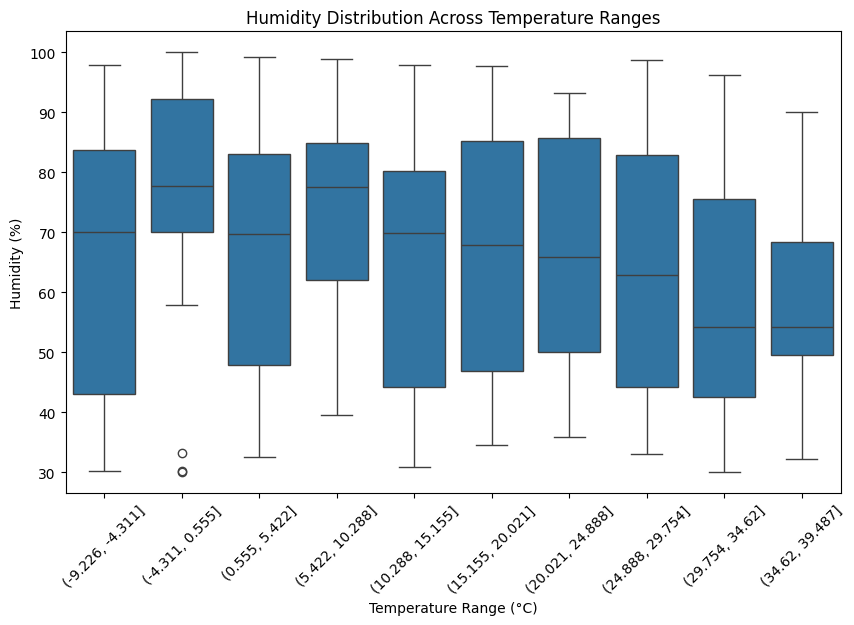

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Temperature'], bins=10), y='Humidity', data=df)
plt.title('Humidity Distribution Across Temperature Ranges')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.show()



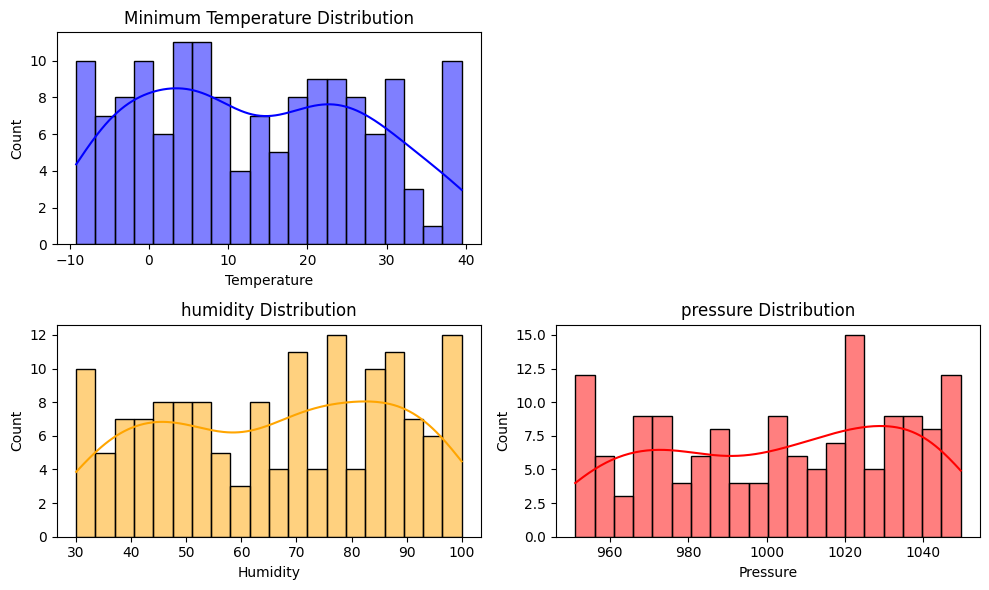

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Temperature'], bins=20, kde=True, color='blue')
plt.title('Minimum Temperature Distribution')



plt.subplot(2, 2, 3)
sns.histplot(df['Humidity'], bins=20, kde=True, color='orange')
plt.title('humidity Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Pressure'], bins=20, kde=True, color='red')
plt.title('pressure Distribution')
plt.tight_layout()
plt.show()


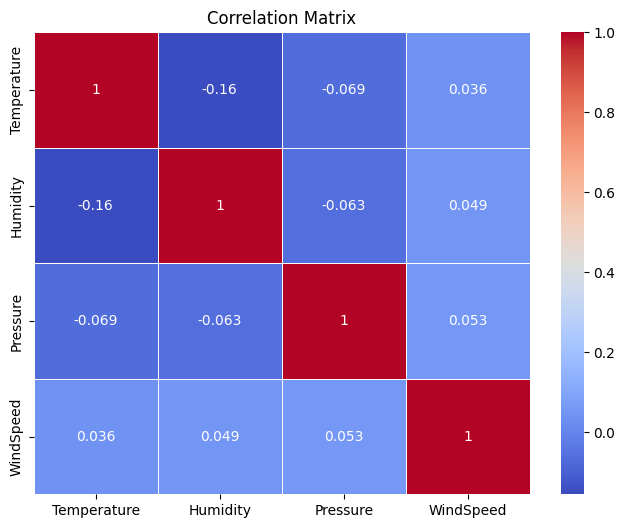

In [98]:
# Correlation matrix
correlation_matrix = df[['Temperature', 'Humidity', 'Pressure', 'WindSpeed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [107]:
X = df[['DayOfWeek', 'Humidity', 'Pressure', 'WindSpeed']]  # Features
y = df['Temperature']  # Target variable

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
print(X_train.head())
print(y_train.head())

    DayOfWeek   Humidity     Pressure  WindSpeed
22          6  77.634141  1008.359659   8.015982
15          0  63.629471  1012.925708   3.394986
65          4  57.887086  1042.548860  18.428741
11          2  97.588757   954.320202   7.511452
42          5  70.130126   957.016330   1.533070
22     6.991590
15    29.438613
65    -1.548607
11     6.758257
42    -7.119524
Name: Temperature, dtype: float64


In [137]:
from sklearn.linear_model import LinearRegression

# Function to predict temperature based on input features
def predict_temperature(Date, Humidity, WindSpeed, Pressure):
    if Date is None:
        print("Please select a date.")
        return

    # Convert Date to day of the week (Monday=0, Sunday=6)
    day_of_week = Date.weekday()

    # Prepare input features as a numpy array
    input_features = np.array([[day_of_week, Humidity, WindSpeed, Pressure]])

    # Predict temperature using the model
    predicted_temp = model.predict(input_features)

    # Display the predicted temperature
    print(f"Predicted Temperature: {predicted_temp[0]:.2f} °C")

# Example model (replace with your trained model)
model = LinearRegression()

# Example function to simulate model training (replace with actual training steps)
def train_model():
    # Example training data (replace with your actual training data)
    X_train = np.array([[0, 50, 10, 1013], [1, 60, 15, 1015], [2, 55, 12, 1012]])
    y_train = np.array([25, 26, 24])  # Example target variable (temperature)

    # Train the model (replace with your actual training code)
    model.fit(X_train, y_train)

# Train the model (call this function with your actual data)
train_model()



In [138]:

# Create widgets for input features
date_picker = widgets.DatePicker(description='Select Date')
humidity_widget = widgets.FloatSlider(value=50.0, min=0.0, max=100.0, step=0.1, description='Humidity')
wind_speed_widget = widgets.FloatSlider(value=10.0, min=0.0, max=50.0, step=0.1, description='Wind Speed')
pressure_widget = widgets.FloatSlider(value=1013.0, min=900.0, max=1100.0, step=0.1, description='Pressure')

# Display widgets and make predictions on interaction
interactive_plot = widgets.interactive(predict_temperature,
                                       Date=date_picker,
                                       Humidity=humidity_widget,
                                       WindSpeed=wind_speed_widget,
                                       Pressure=pressure_widget)

display(interactive_plot)



interactive(children=(DatePicker(value=None, description='Select Date'), FloatSlider(value=50.0, description='…